In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Synthetic data generation

### 1.1 Linear data

In [2]:
def true_fun(x, a=np.pi, b=0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    
    if f is None: f = lambda x: x

    x = np.sum([ai * np.power(x, i + 1) for i, ai in enumerate(a)], axis=0)

    return f(x + b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max = 1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)
    
    if random_x:
        x = np.sort(np.random.rand(N)) * x_max    
    else:
        x = np.linspace(0, x_max, N)
    
    y_true = np.array([])
    
    for f_ in np.append([], f):
        y_true = np.append(y_true, true_fun(x, a, b, f_))
    
    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

In [3]:
def visualize_data(y, y_true, x, title):
    fig = plt.figure(figsize=(10, 7))
    plt.scatter(x[:, 0], y, edgecolor = 'b', label = "Noise data", s = 196, alpha = 0.6)
    plt.scatter(x[:, 0], y_true,label = "True data", s = 81, c = 'g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=15)
    plt.title(title, fontsize=15)
    plt.xticks()
    plt.yticks();
    plt.tight_layout()
    plt.show()

#### 1.1.1

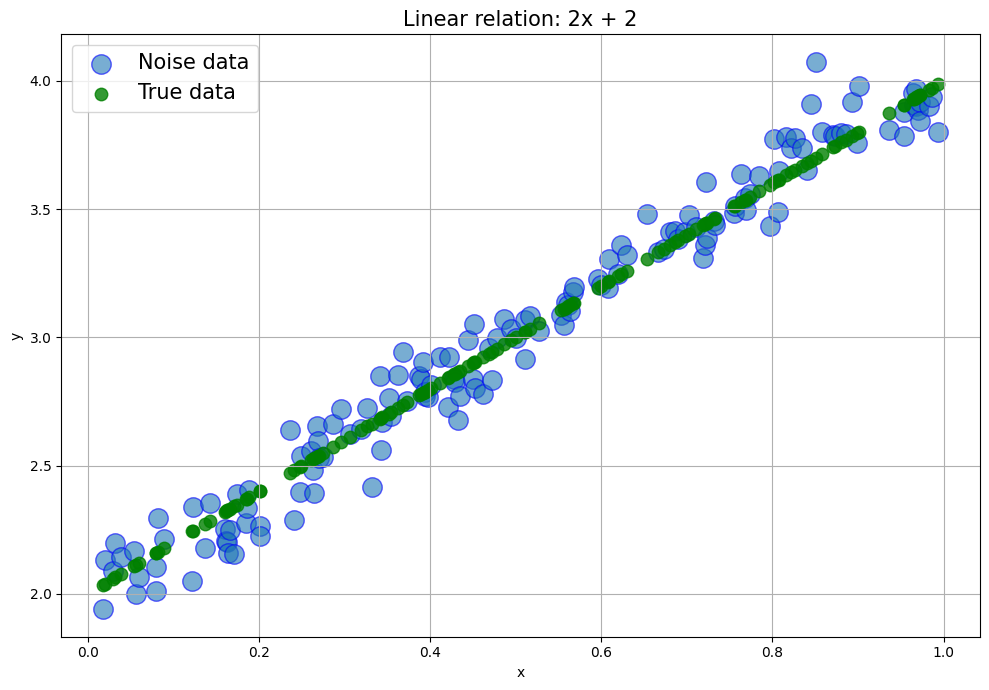

In [4]:
linear_1_y, linear_1_y_true_line, linear_1_x = dataset(
    a=2,
    b=2,
    f=None,
    N=150,
    x_max=1,
    noise_power=0.1,
    seed=33
)

visualize_data(linear_1_y, linear_1_y_true_line, linear_1_x, 'Linear relation: 2x + 2')

#### 1.1.2

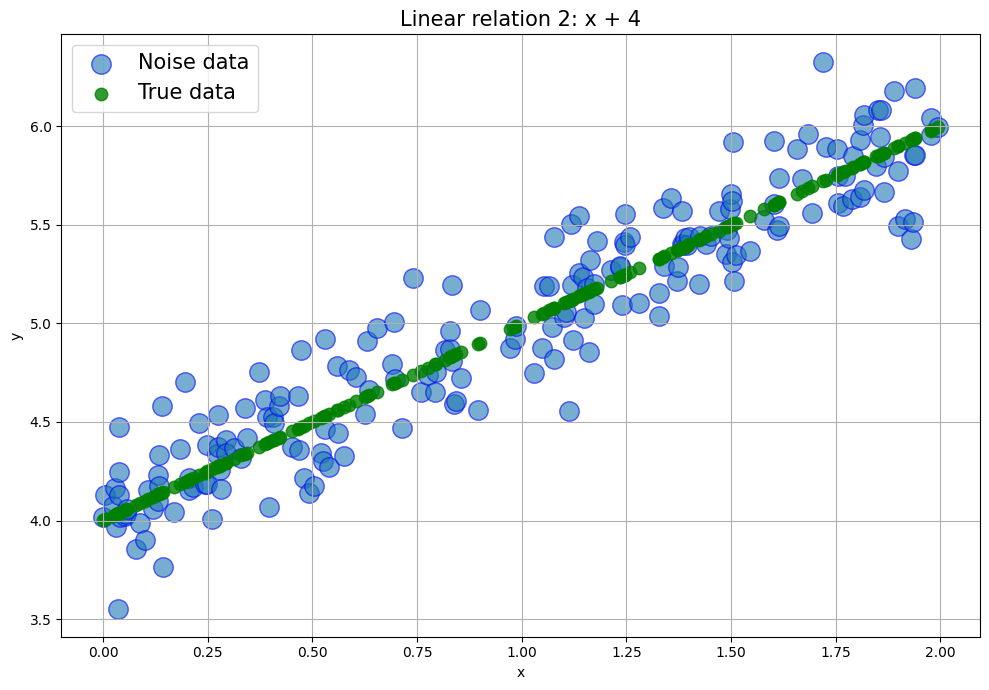

In [5]:
linear_2_y, linear_2_y_true_line, linear_2_x = dataset(
    a=1,
    b=4,
    f=None,
    N=200,
    x_max=2,
    noise_power=0.2,
    seed=1
)

visualize_data(linear_2_y, linear_2_y_true_line, linear_2_x, 'Linear relation 2: x + 4')

### 1.2 Sinusoidal relation

#### 1.2.1

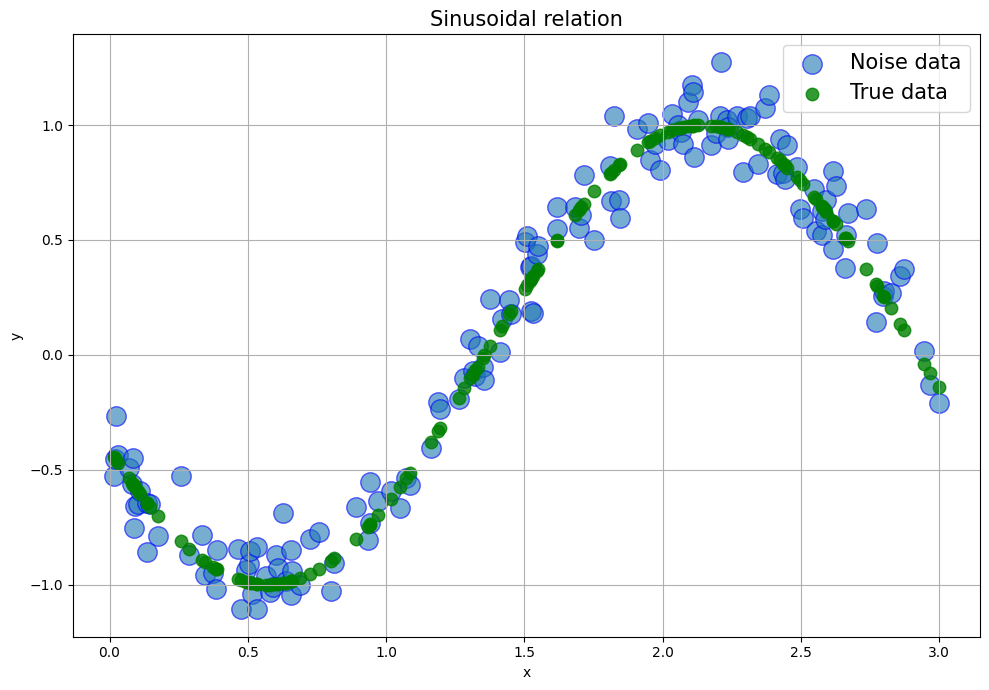

In [6]:
sinusoidal_y, sinusoidal_y_true_line, sinusoidal_x = dataset(
    a=2,
    b=2,
    f=np.cos,
    N=150,
    x_max=3,
    noise_power=0.1,
    seed=22
)

visualize_data(sinusoidal_y, sinusoidal_y_true_line, sinusoidal_x, 'Sinusoidal relation')

### 1.3 Polynomial data

#### 1.3.1

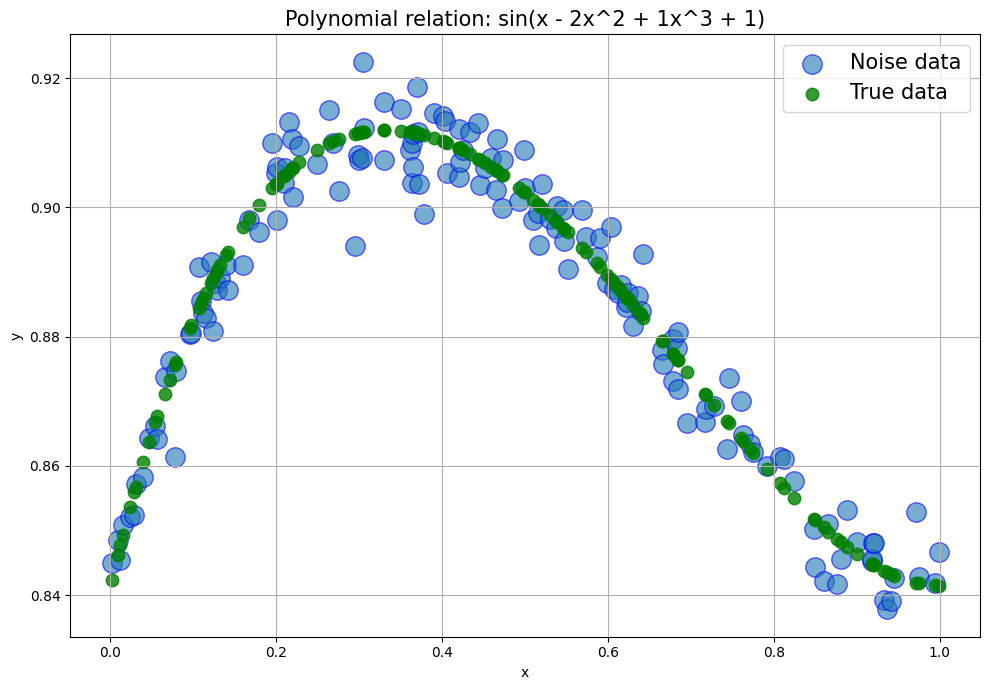

In [7]:
polynomial_1_y, polynomial_1_y_true_line, polynomial_1_x = dataset(
    a=[1, -2, 1],
    b=1,
    f=np.sin,
    N=150,
    x_max=1,
    noise_power=0.005,
    seed=15
)

visualize_data(polynomial_1_y, polynomial_1_y_true_line, polynomial_1_x, 'Polynomial relation: sin(x - 2x^2 + 1x^3 + 1)')

#### 1.3.2

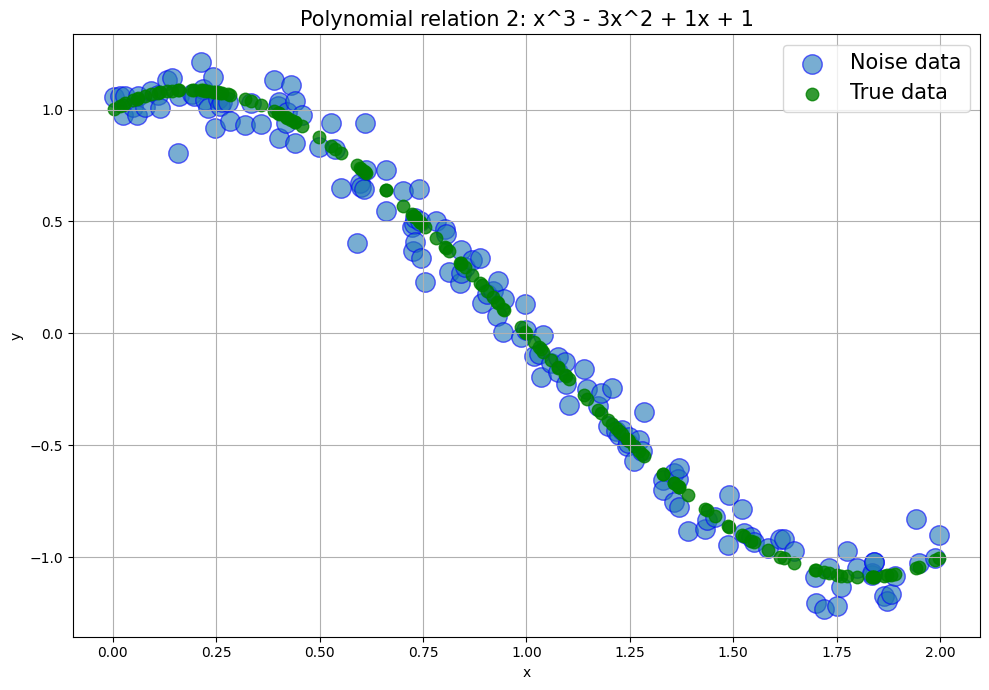

In [8]:
polynomial_2_y, polynomial_2_y_true_line, polynomial_2_x = dataset(
    a=[1, -3, 1],
    b=1,
    f=None,
    N=150,
    x_max=2,
    noise_power=0.1,
    seed=15
)

visualize_data(polynomial_2_y, polynomial_2_y_true_line, polynomial_2_x, 'Polynomial relation 2: x^3 - 3x^2 + 1x + 1')

#### 1.3.3

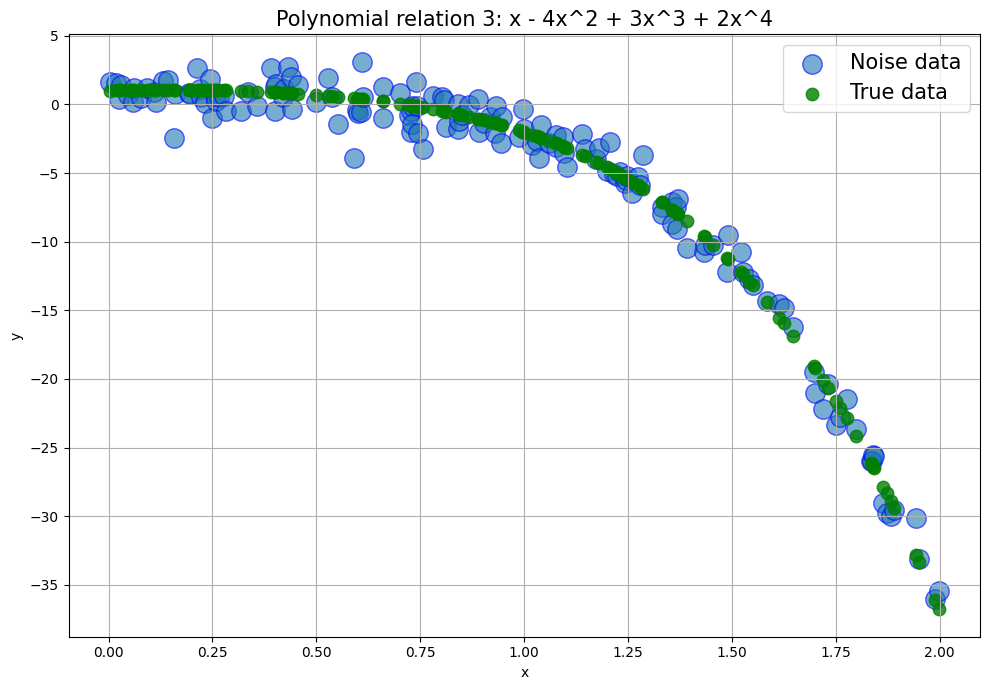

In [9]:
polynomial_3_y, polynomial_3_y_true_line, polynomial_3_x = dataset(
    a=[1, -4, 3, -3],
    b=1,
    f=None,
    N=150,
    x_max=2,
    noise_power=1.25,
    seed=15
)

visualize_data(polynomial_3_y, polynomial_3_y_true_line, polynomial_3_x, 'Polynomial relation 3: x - 4x^2 + 3x^3 + 2x^4')